### CONFIGURATION

In [77]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
pd.set_option('display.width', 20)
import numpy as np
import os
import copy
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
# Hartwig imports
sys.path.append("/Users/peterpriestley/hmf/repos/scripts/analysisscripts") 
import analyseVCF as aVCF
import venn as vn

In [52]:
# LOAD BED
#BED_PATH = "/Users/peterpriestley/hmf/analyses/giabTruthsets/"
#BED_FILE_NAME = "NA12878_GIAB_highconf_IllFB-IllGATKHC-CG-Ion-Solid_ALLCHROM_v3.2.2_highconf.bed"
BED_PATH = "/Users/peterpriestley/hmf/analyses/slices/"  
#BED_FILE_NAME = "HMF_Slicing.bed"
BED_FILE_NAME = "cosmicCancerCensus.bed"
USE_BED = True
LOAD_FULL_FILE = True

### Functions

In [53]:
def findFiles(path,suffix):
    files=[]
    for x in os.listdir(path):
        if x[-len(suffix):] == suffix:
            files.append(x)
    return files

In [94]:
def AFByPosPlot(pos,AF,startChartPos,endChartPos):
    plt.figure(figsize=[18,5])
    plt.scatter(pos, AF)
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.axis([startChartPos, endChartPos,0, 1.0])
    plt.show()

In [54]:
def loadVCF(path,filename,sampleNames,patientID):
    df = pd.DataFrame()
    if USE_BED:
        bed = aVCF.loadBEDFile(BED_PATH,BED_FILE_NAME)
        return pd.concat([df,aVCF.loadVariantsFromVCF(path,filename,sampleNames,patientID,True,True,bed,LOAD_FULL_FILE)])
    else:
        return pd.concat([df,aVCF.loadVariantsFromVCF(path,filename,sampleNames,patientID,True)])

<h3> Load VCFs and Prepare DF

In [120]:
PATH = "/Users/peterpriestley/hmf/analyses/v1.12samples/CPCT02010506/"
patientID = "CPCT02010506T"

In [121]:
svVCFFilename = findFiles(PATH,"somaticSV.vcf")[0]
print "SV =",svVCFFilename
print "patient =",patientID

SV = somaticSV.vcf
patient = CPCT02010506T


In [122]:
dfSV = loadVCF(PATH,svVCFFilename,{patientID:'tumor'},patientID)

reading vcf file: somaticSV.vcf
reading VCF File line: 1
Number variants loaded: 200


In [123]:
pd.pivot_table(dfSV[(dfSV.variantSubType<>"IGN")&(dfSV.tumorAF>=0.12)], values='id', index=['variantSubType'], columns=['variantType'], aggfunc='count').fillna("")

variantType,SV
variantSubType,
BND,6
DEL,11
INS,3
INV,1


### SLICING_REGION_VARIANTS

In [124]:
dfSV[(dfSV.bedRegion<>"")&(dfSV.variantSubType<>"IGN")][['chrom','pos','chromFrac','variantSubType','bedRegion','tumorallele','tumorAF','tumorSGT','tumorSVLenMin','tumorSVLenMax','tumorSVStartMin','tumorSVStartMax']]

,chrom,pos,chromFrac,variantSubType,bedRegion,tumorallele,tumorAF,tumorSGT,tumorSVLenMin,tumorSVLenMax,tumorSVStartMin,tumorSVStartMax
27,3,60465195,3.305345,DEL,FHIT,<DEL>,0.032787,177,49245,49247,60465195,60465196
186,20,57467588,20.911815,DEL,GNAS,<DEL>,0.122807,200,4115035,4115037,57467588,57467589


### TRANSLOCATIONS

In [128]:
def findendBreakpointPos():
    # For del, ins, inv
    pass


In [129]:
def findMatchingBNDChromPos(df):
    # can 
    df['BNDMatchPos'] = ""
    for i in range(0,df.shape[0]):
        if df.iloc[i]['variantSubType'] == "BND":
            tmp = df.iloc[i]['tumorallele'].find("]")
            if tmp >= 0:
                df.iloc[i,df.columns.get_loc('BNDMatchPos')] = df.iloc[i]['tumorallele'][tmp+1:df.iloc[i]['tumorallele'].find("]",tmp+1)]
    return df

In [130]:
dfSV = findMatchingBNDChromPos(dfSV)

In [138]:
dfSV[(dfSV.variantSubType=="BND")&(dfSV.tumorAF>=0.08)][['chrom','pos','chromFrac','variantSubType','bedRegion','BNDMatchPos','tumorallele','tumorAF','tumorDP','tumorSGT','tumorSVLenMin','tumorSVLenMax','tumorSVStartMin','tumorSVStartMax']]

,chrom,pos,chromFrac,variantSubType,bedRegion,BNDMatchPos,tumorallele,tumorAF,tumorDP,tumorSGT,tumorSVLenMin,tumorSVLenMax,tumorSVStartMin,tumorSVStartMax
11,1,113542167,1.455534,BND,,,[15:97382059[G,0.114943,1,154,-320,319,113541848,113542487
21,2,162072423,2.666418,BND,,X:71581411,]X:71581411]T,0.099585,1,217,-2,0,162072423,162072425
32,3,151147687,3.763286,BND,,,[6:40935264[C,0.089069,1,225,-391,390,151147297,151148078
33,3,151148417,3.763289,BND,,6:40935275,C]6:40935275],0.119048,1,148,-2,0,151148417,151148419
55,5,59241706,5.327456,BND,,,T[20:22593796[,0.081633,1,225,0,0,59241706,59241706
56,5,60033003,5.331829,BND,,20:32230676,]20:32230676]G,0.114815,1,239,-1,0,60033003,60033004
62,5,63295019,5.349860,BND,,,[20:32301194[GA,0.180982,1,267,-1,0,63295019,63295020
69,6,40935264,6.239227,BND,,,[3:151147687[T,0.089069,1,225,-418,418,40934846,40935682
70,6,40935273,6.239227,BND,,3:151148419,T]3:151148419],0.119048,1,148,-2,0,40935273,40935275
88,7,95846558,7.602283,BND,,,[17:48118434[A,0.115607,1,153,-187,187,95846371,95846745


In [132]:
11/180.0

0.06111111111111111

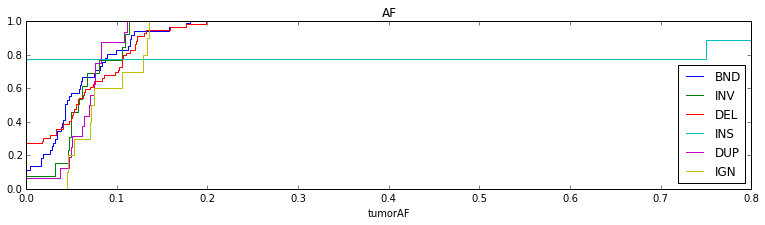

In [133]:
for variantSubType in dfSV.variantSubType.unique():
    ser = dfSV[(dfSV.variantSubType == variantSubType)]["tumorAF"].sort_values()
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser,name=variantSubType)
    ser_cdf.plot(drawstyle='steps',legend=True,title="AF",figsize=[13,3],xlim=[0.0,0.8],ylim=[0.0,1.0])